## `R`을 이용한 생존시간 계산

시간 관측 값이 *시점*과 *종점* 으로 주어질 때 생존시간 계산 
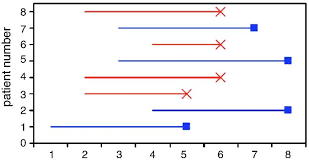

-  base `R` 
- `lubridate` package 


### `lubridate` Package

- `R`에서 날짜 자료 다루는 패키지
- Garrett Grolemund 와 Hadley Wickham 외 8명이 만듬
- `tidyverse`에 포함되어 있음

In [2]:
library(tidyverse)
library(lubridate)

- `ymd`, `mdy`, `dmy` 함수 : dates 객체 생성
- `year`, `month`, `day` 함수 : dates 객체로부터 부분 정보 추출

In [3]:
ymd("2020/09/07")

mdy("09/07/2020")

dmy("07/09/2020")

[1] "2020-09-07"

[1] "2020-09-07"

[1] "2020-09-07"

In [4]:
d1 <- ymd("2020/09/07")
year(d1)

[1] 2020

### 관측 시작 시점과 마지막 시점이 주어진 생존자료

1. R의 date 형식으로 변환
2. 생존시간 계산

**`R`을 이용한 생존시간 계산**


<h3> <span style="color:CornflowerBlue"> <b> Example : </b> </span></h3> 

- `sx_date` : 수술 날짜 (surgery date )
- `last_fup_date` :  마지막 추적 관측 날짜 (last follow-up date)

In [5]:
date_ex <- 
  tibble(
    sx_date = c("2007-06-22", "2004-02-13", "2010-10-27"), 
    last_fup_date = c("2017-04-15", "2018-07-04", "2016-10-31")
    )

glimpse(date_ex)

Rows: 3
Columns: 2
$ sx_date       <chr> "2007-06-22", "2004-02-13", "2010-10-27"
$ last_fup_date <chr> "2017-04-15", "2018-07-04", "2016-10-31"


*NOTE* 
- 두 변수는  문자변수 $\rightarrow$ date 형식으로 변환 필요
- 두 날짜의 차이 계산한 후 숫자 형식으로 변환

<h3> <span style="color:CornflowerBlue"> <b>  base `R` 이용 </b> </span></h3> 

- `as.Date`


#### Formatting dates 

In [6]:
(date_r<- date_ex %>% 
  mutate(
    sx_date = as.Date(sx_date, format = "%Y-%m-%d"), 
    last_fup_date = as.Date(last_fup_date, format = "%Y-%m-%d") 
    ))

sx_date,last_fup_date
<date>,<date>
2007-06-22,2017-04-15
2004-02-13,2018-07-04
2010-10-27,2016-10-31


- 주어진 날짜 자료가 `m/d/Y` 형식이면  `format = "%m/%d/%Y"`로 입력
-  date format symbols 참조 [https://www.statmethods.net/input/dates.html](https://www.statmethods.net/input/dates.html)

#### Calculating survival times 
- `difftime` : 경과 시간 일 단위 (units="days")
- `as.numeric`: 숫자 형식으로 변환
- `/365.25`: 년 단위로 변환

In [7]:
date_r %>% 
  mutate(
    os_yrs = 
      as.numeric(
        difftime(last_fup_date, 
                 sx_date, 
                 units = "days")) / 365.25
    )

sx_date,last_fup_date,os_yrs
<date>,<date>,<dbl>
2007-06-22,2017-04-15,9.815195
2004-02-13,2018-07-04,14.387406
2010-10-27,2016-10-31,6.012320


<h3> <span style="color:CornflowerBlue"> <b>   `lubridate` package 이용 </b> </span></h3> 


- `ymd`

#### Formatting dates

In [8]:
(date_l <- date_ex %>% 
  mutate(
    sx_date = ymd(sx_date), 
    last_fup_date = ymd(last_fup_date)
    ))

sx_date,last_fup_date
<date>,<date>
2007-06-22,2017-04-15
2004-02-13,2018-07-04
2010-10-27,2016-10-31


- base `R` 에서와 달리 분리자가 필요없음

#### Calculating survival times 
- `%--%` 연산자 : 시간 구간 차이 
- `as.duration` : 초 단위 경과시간 
- `dyears(1)`: 년 단위로 변환

In [9]:
date_l %>% 
  mutate(
    os_yrs = 
      as.duration(sx_date %--% last_fup_date) / dyears(1)
    )

sx_date,last_fup_date,os_yrs
<date>,<date>,<dbl>
2007-06-22,2017-04-15,9.821918
2004-02-13,2018-07-04,14.397260
2010-10-27,2016-10-31,6.016438


### 과제

각자 태어나서 지금까지 몇 일 살았는지 base R과 lubridate 패키지를 이용하여 계산하기
